In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fide-chess-rankings-updated/Chess FIDE Rankings.csv


In [2]:
df = pd.read_csv("../input/fide-chess-rankings-updated/Chess FIDE Rankings.csv")

In [3]:
df.head()

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


In [4]:
df.shape

(200, 7)

As you can see we have the data for about 200 players and we are given 7 features about these players.

In [5]:
df.describe()

,rank,ELO,games,birth_year
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2662.385000,1394.185000,1989.395000
std,57.879185,47.208793,776.177129,9.057548
min,1.000000,2608.000000,277.000000,1965.000000
25%,50.750000,2623.750000,785.000000,1984.000000
50%,100.500000,2650.500000,1211.000000,1990.000000
75%,150.250000,2686.000000,1784.000000,1996.000000
max,200.000000,2864.000000,3913.000000,2006.000000


In [5]:
df.describe(include = 'object')

,name,title,federation
count,200,200,200
unique,200,1,43
top,Magnus Carlsen,GM,Russian Federation
freq,1,200,22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         200 non-null    int64 
 1   name         200 non-null    object
 2   ELO          200 non-null    int64 
 3   title        200 non-null    object
 4   federation   200 non-null    object
 5   games        200 non-null    int64 
 6   birth_year   200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [7]:
df.isna().sum()
#No missing values

rank           0
name           0
ELO            0
title          0
federation     0
games          0
birth_year     0
dtype: int64

## Thoughts about the features:
* Name - All 200 unique players
* Federations - 43 different federations 
* ELO - It is the points system given by FIDE depending upon wins/losses
* Birth year - Average age of the players is 33; can add a new feature 'Age'
* Title - All of them are GM(should probably drop this)


In [8]:
df.drop(['title'], axis= 1, inplace=True)

In [9]:
df.columns = df.columns.str.strip()

### Top 5 federations with highest number of players
2. Average age of players
3. ELO ratings V/S games played
4. ELO ratings V/S age

In [10]:
top_5_countries = df['federation'].value_counts().head()
top_5_countries

Russian Federation     22
United States          19
India                  17
Ukraine                13
FIDE                   12
Name: federation, dtype: int64

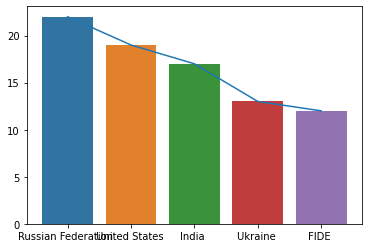

In [11]:
sns.barplot(x= top_5_countries.index, y= top_5_countries.to_list())
sns.lineplot(x= top_5_countries.index, y= top_5_countries.to_list())
plt.show()

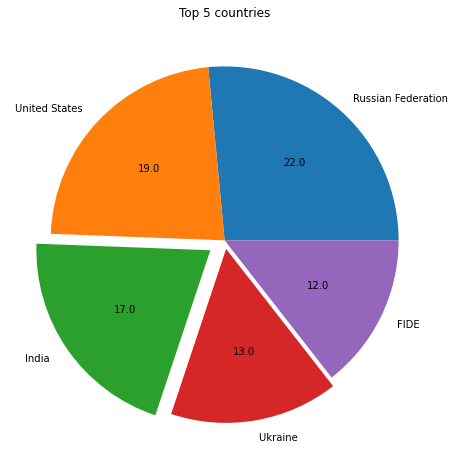

In [12]:
plt.subplots(figsize=(8,8))
size = df["federation"].value_counts().sort_values(ascending = False).head()
def value(val):
    x = np.round(val/100 *size.sum())
    return x 
plt.pie(size, labels = size.index, autopct = value, explode = [0,0,0.1,0.05,0])
plt.title("Top 5 countries")
plt.show()

So, the russian federation leads with the most active Grandmasters.
Also, FIDE is the International Chess Federation. Players who do not represent their countries are represented by FIDE

### How old are the players?

In [13]:
import datetime
df['age'] = datetime.datetime.now().year - df['birth_year'] 

In [14]:
df.head()

,rank,name,ELO,federation,games,birth_year,age
0,1,Magnus Carlsen,2864,Norway,3125,1990,32
1,2,Liren Ding,2806,China,1630,1992,30
2,3,Alireza Firouzja,2793,France,845,2003,19
3,4,Fabiano Caruana,2783,United States,2622,1992,30
4,5,Levon Aronian,2775,United States,3320,1982,40


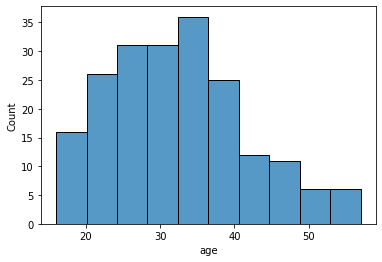

In [15]:
sns.histplot(x = 'age',data = df)
plt.show()

We can see that most players are from the 30-40 year old age bracket.

### Play more to win more?


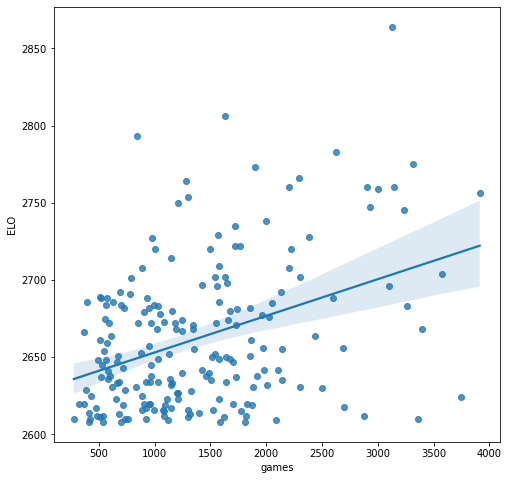

In [16]:
plt.figure(figsize = (8,8))
sns.regplot(x = 'games', y= 'ELO', data = df)
plt.show()

Positive slope means that the more games the Grandmasters played the more they tend to gain points

### Is chess a young man's game?

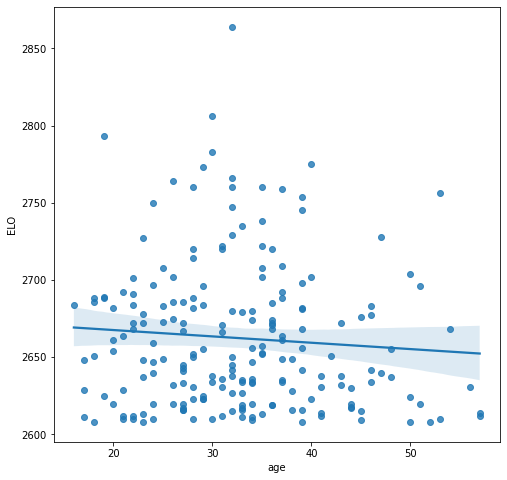

In [17]:
plt.figure(figsize=(8,8))
sns.regplot(x='age',y='ELO', data=df)
plt.show()

Players with age greater than 50 generally happen to have lower ELO points

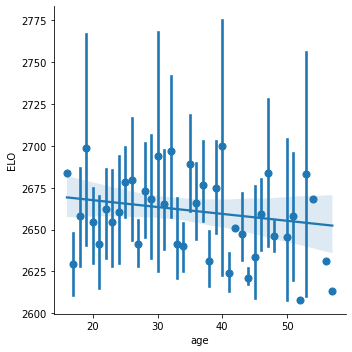

In [18]:
sns.lmplot(x='age', y = 'ELO', data = df, x_estimator = np.mean)

In [19]:
def corr(x,y): return np.corrcoef(x,y)[0][1]
corr(df.games, df.ELO)

0.39022960342975094

In [20]:
def show_corr(df,a,b):
    x,y = df[a],df[b]
    plt.scatter(x,y, alpha = 0.5, s=4)
    plt.title(f'{a} vs {b}; r:{corr(x,y):.2f}')

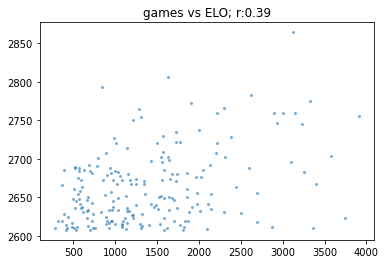

In [21]:
show_corr(df, 'games','ELO')